In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

#### Duplicates

In [2]:
DD = pd.read_csv(r'Travel_Bag_Project.csv')

In [3]:
DD.head()

Unnamed: 0               Brand                         Model  \
0           0  AMERICAN TOURISTER  ['78 L Strolley Duffel Bag']   
1           1              SAFARI  ['56 L Strolley Duffel Bag']   
2           2               Astro  ['55 L Strolley Duffel Bag']   
3           3             SD Star  ['60 L Strolley Duffel Bag']   
4           4            Anjaneya      ['60 L Hand Duffel Bag']   

  Actual Price(in Rs) Discount %  Price(in Rs) Capacity(in Lts)  \
0              ₹4,090    61% off        1569.0             78 L   
1              ₹3,870    71% off        1109.0             56 L   
2              ₹2,799    89% off         282.0             55 L   
3              ₹2,499    85% off         363.0             60 L   
4                ₹899    12% off         789.0             60 L   

   Free Delivery         Range  
0  Free delivery  Below ₹2,000  
1  Free delivery  Below ₹2,000  
2            NaN    Below ₹500  
3  Free delivery    Below ₹500  
4  Free delivery  Below ₹1,000

In [4]:
DD.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
DD[DD.duplicated()]

Brand                         Model  \
6                          Wildcraft      ['40 L Hand Duffel Bag']   
8                          Wildcraft      ['40 L Hand Duffel Bag']   
9                           Anjaneya      ['60 L Hand Duffel Bag']   
19                            SAFARI  ['55 L Strolley Duffel Bag']   
24                             WROGN  ['70 L Strolley Duffel Bag']   
..                               ...                           ...   
873              Aliya Aliva Luggage  ['60 L Strolley Duffel Bag']   
876  Kamiliant by American Tourister  ['41 L Strolley Duffel Bag']   
877                        Nice Line  ['60 L Strolley Duffel Bag']   
878                Rozen Luggage Bag      ['60 L Hand Duffel Bag']   
879              Aliva Aliya Luggage  ['58 L Strolley Duffel Bag']   

    Actual Price(in Rs) Discount %  Price(in Rs) Capacity(in Lts)  \
6                ₹2,199    60% off         869.0             40 L   
8                ₹2,199    60% off         869.0             40 L   
9                  ₹899    12% off         789.0             60 L   
19               ₹3,870    71% off        1109.0             55 L   
24               ₹3,999    83% off         649.0             70 L   
..                  ...        ...           ...              ...   
873              ₹3,999    72% off        1099.0             60 L   
876              ₹3,150    65% off        1089.0             41 L   
877              ₹2,499    82% off         427.0             60 L   
878              ₹1,983    72% off         555.0             60 L   
879              ₹1,999    75% off         499.0             58 L   

     Free Delivery         Range  
6    Free delivery  Below ₹1,000  
8    Free delivery  Below ₹1,000  
9    Free delivery  Below ₹1,000  
19   Free delivery  Below ₹2,000  
24   Free delivery  Below ₹1,000  
..             ...           ...  
873  Free delivery  Below ₹2,000  
876  Free delivery  Below ₹2,000  
877  Free delivery    Below ₹500  
878  Free delivery  Below ₹1,000  
879  Free delivery    Below ₹500  

[465 rows x 8 columns]

In [6]:
DD.drop_duplicates(inplace = True)

## Structural errors and TypeCasting

In [7]:
DD['Model'] = DD['Model'].str.strip('[]')

In [8]:
DD['Model'] = DD['Model'].str.extract(r'\d{2}\s?\w (\w+\s?\w+\s?\w+)')

In [9]:
DD['Model']

0      Strolley Duffel Bag
1      Strolley Duffel Bag
2      Strolley Duffel Bag
3      Strolley Duffel Bag
4          Hand Duffel Bag
              ...         
865        Hand Duffel Bag
869    Strolley Duffel Bag
872    Strolley Duffel Bag
874    Strolley Duffel Bag
875    Strolley Duffel Bag
Name: Model, Length: 415, dtype: object

In [10]:
DD['Model'].unique()

array(['Strolley Duffel Bag', 'Hand Duffel Bag', nan, 'Gym Duffel Bag'],
      dtype=object)

In [11]:
DD["Actual Price(in Rs)"] = DD["Actual Price(in Rs)"].replace(r'[₹,]',"",regex = True).astype('float16')

In [12]:
DD["Actual Price(in Rs)"].unique()

array([ 4090.,  3870.,  2800.,  2500.,   899.,  2200.,  2950.,  4500.,
        3750.,  3940.,    nan,  4000.,  1449.,  3790.,  3000.,   900.,
        4660.,  3150.,  2700.,  1999.,  1399.,  1469.,  4160.,  2548.,
        2300.,  3500.,  2948.,  1985.,  5000.,  1499.,  2400.,  4620.,
        1299.,  5592.,  2156.,  1899.,  3700.,  1649.,  3730.,  1799.,
        1599.,  1957.,  3600.,  4600.,  1349.,   799.,   999.,   599.,
        2000.,   499.,  2498.,  5672.,  9000.,  2796.,  3896.,  3496.,
        2472.,  4700.,  2050.,  1459.,  2124.,  6000.,  2298.,  1549.,
        3570.,  5500.,  1500.,  2450.,  1699.,  2580.,  1199., 64992.,
        4496.,  1983.,  2624.,  2168.,  2600.,   649.,  1200.,  1329.,
        2448.,  1902.,  3424.,  5600.,   749.,  3300.,  3100.,   699.,
        5048.,  2900.,  1798.,  3200.,  2100.,  2998.,  1099.,  5552.,
        4140., 24496., 10384.,  2680.,  6404.,  1400.,  3800.],
      dtype=float16)

In [13]:
DD['Discount %'] = DD['Discount %'].replace(r'[% off]',"",regex = True).astype('float16')

In [14]:
DD['Discount %'].unique()

array([61., 71., 89., 85., 12., 60., 62., 57., 90., nan, 73., 64., 87.,
       83., 13., 75., 72., 65., 82., 78., 43., 70., 74., 56., 63., 77.,
       55., 68., 53., 80., 84., 81., 52.,  5., 33., 79., 50., 31., 91.,
       58., 67., 54., 76., 88., 86., 44., 36., 69., 46., 49., 29., 34.,
       30., 93., 59., 48., 20., 66., 18., 35., 10., 23., 38., 39., 22.],
      dtype=float16)

In [15]:
DD["Capacity(in Lts)"] = DD["Capacity(in Lts)"].replace(r'[l L]',"", regex = True).astype('float16')

In [16]:
DD["Capacity(in Lts)"].unique()

array([78., 56., 55., 60., 40., 52., nan, 66., 80., 45., 75., 30., 65.,
       70., 41., 90., 37., 25., 62., 35., 58., 61., 27., 49., 50., 34.,
       46., 23., 10., 22.,  0., 69., 20., 42., 28., 39., 86., 32., 12.,
       29., 13., 33., 43., 85., 57., 63., 54., 48.], dtype=float16)

In [17]:
DD[DD["Capacity(in Lts)"] == 0]

Brand           Model  Actual Price(in Rs)  Discount %  Price(in Rs)  \
264  Hasan  Gym Duffel Bag                499.0        63.0         180.0   

     Capacity(in Lts) Free Delivery       Range  
264               0.0           NaN  Below ₹500

In [18]:
DD["Capacity(in Lts)"] = DD["Capacity(in Lts)"].replace(0,np.nan,regex = True)

In [19]:
DD[DD["Capacity(in Lts)"] == 0]

Empty DataFrame
Columns: [Brand, Model, Actual Price(in Rs), Discount %, Price(in Rs), Capacity(in Lts), Free Delivery, Range]
Index: []

In [20]:
DD["Capacity(in Lts)"].unique()

array([78., 56., 55., 60., 40., 52., nan, 66., 80., 45., 75., 30., 65.,
       70., 41., 90., 37., 25., 62., 35., 58., 61., 27., 49., 50., 34.,
       46., 23., 10., 22., 69., 20., 42., 28., 39., 86., 32., 12., 29.,
       13., 33., 43., 85., 57., 63., 54., 48.], dtype=float16)

In [21]:
DD['Free Delivery']

0      Free delivery
1      Free delivery
2                NaN
3      Free delivery
4      Free delivery
           ...      
865    Free delivery
869    Free delivery
872    Free delivery
874    Free delivery
875    Free delivery
Name: Free Delivery, Length: 415, dtype: object

In [22]:
def delivery(n):
    if n == 'Free delivery':
        return 'Yes'
    else:
        return 'No'
DD['Free Delivery'] = DD['Free Delivery'].apply(delivery)

In [23]:
DD['Free Delivery'].isna().sum()

0

In [24]:
DD['Price(in Rs)'] = DD['Price(in Rs)'].astype('float16')

## Outliers

<Axes: >

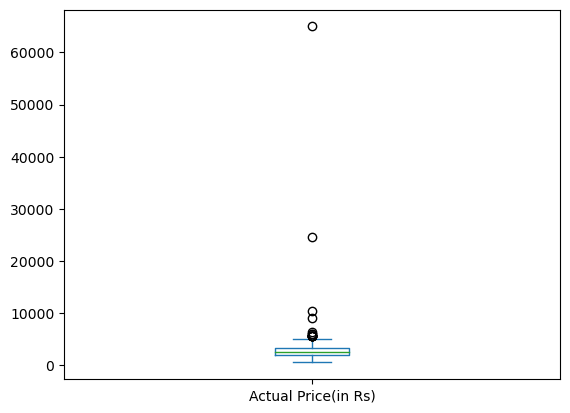

In [25]:
DD['Actual Price(in Rs)'].plot(kind = 'box')

In [26]:
DD['Price(in Rs)'].plot(kind = 'box')

<Axes: >

<Axes: >

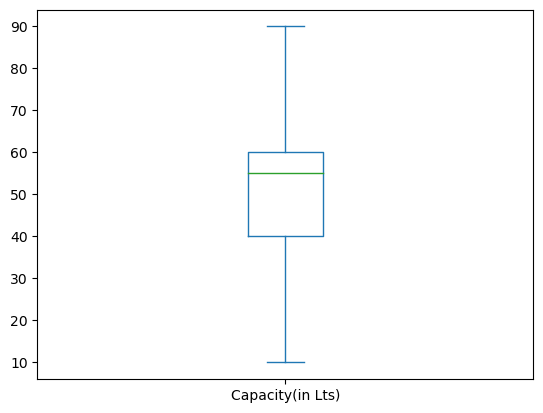

In [27]:
DD['Capacity(in Lts)'].plot(kind = 'box')

#### Representation.
1) Although there are outliers for Actual Price and Selling Price,we are not Replacing or Removing the values as these are True values.

## Treating missing values

In [28]:
DD.isna().sum()

Brand                  0
Model                  7
Actual Price(in Rs)    3
Discount %             3
Price(in Rs)           1
Capacity(in Lts)       8
Free Delivery          0
Range                  1
dtype: int64

In [29]:
DD['Model'].fillna(DD['Model'].mode()[0], inplace = True)
DD['Price(in Rs)'].fillna(DD['Price(in Rs)'].median(), inplace = True)
DD['Actual Price(in Rs)'].fillna(DD['Actual Price(in Rs)'].median(), inplace = True)
DD['Discount %'].fillna(DD['Discount %'].median(), inplace = True)
DD['Capacity(in Lts)'].fillna(DD['Capacity(in Lts)'].mean(), inplace = True)


In [30]:
DD[DD['Range'].isna()]

Brand            Model  Actual Price(in Rs)  Discount %  Price(in Rs)  \
838   VIP  Hand Duffel Bag               2500.0        75.0         539.0   

     Capacity(in Lts) Free Delivery Range  
838              52.0            No   NaN

In [31]:
DD['Range'].fillna('Below ₹1,000',inplace = True)

In [32]:
DD.isna().sum()

Brand                  0
Model                  0
Actual Price(in Rs)    0
Discount %             0
Price(in Rs)           0
Capacity(in Lts)       0
Free Delivery          0
Range                  0
dtype: int64

In [33]:
DD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 875
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                415 non-null    object 
 1   Model                415 non-null    object 
 2   Actual Price(in Rs)  415 non-null    float16
 3   Discount %           415 non-null    float16
 4   Price(in Rs)         415 non-null    float16
 5   Capacity(in Lts)     415 non-null    float16
 6   Free Delivery        415 non-null    object 
 7   Range                415 non-null    object 
dtypes: float16(4), object(4)
memory usage: 19.5+ KB


In [50]:
DD

Brand                Model  Actual Price(in Rs)  Discount %  \
0    AMERICAN TOURISTER  Strolley Duffel Bag               4090.0        61.0   
1                SAFARI  Strolley Duffel Bag               3870.0        71.0   
2                 Astro  Strolley Duffel Bag               2800.0        89.0   
3               SD Star  Strolley Duffel Bag               2500.0        85.0   
4              Anjaneya      Hand Duffel Bag                899.0        12.0   
..                  ...                  ...                  ...         ...   
865              Strabo      Hand Duffel Bag               1499.0        22.0   
869      SAKSHI FASHION  Strolley Duffel Bag               1999.0        80.0   
872            PROVOGUE  Strolley Duffel Bag               3300.0        86.0   
874            PROVOGUE  Strolley Duffel Bag               3300.0        81.0   
875            WAYCRAFT  Strolley Duffel Bag               3300.0        79.0   

     Price(in Rs)  Capacity(in Lts) Free Delivery         Range  
0          1569.0              78.0           Yes  Below ₹2,000  
1          1109.0              56.0           Yes  Below ₹2,000  
2           282.0              55.0            No    Below ₹500  
3           363.0              60.0           Yes    Below ₹500  
4           789.0              60.0           Yes  Below ₹1,000  
..            ...               ...           ...           ...  
865        1165.0              50.0           Yes  Below ₹2,000  
869         381.0              60.0           Yes    Below ₹500  
872         452.0              50.0           Yes    Below ₹500  
874         594.0              50.0           Yes  Below ₹1,000  
875         686.0              60.0           Yes  Below ₹1,000  

[415 rows x 8 columns]

## Univariate Analysis

#### Numerical Datatype

In [71]:
plt.style.use('ggplot')

<Axes: ylabel='Frequency'>

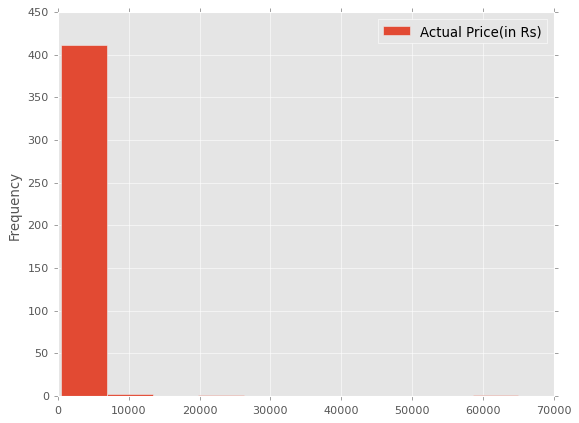

In [72]:
DD['Actual Price(in Rs)'].plot(kind = 'hist', legend = True)

#### Representation
1) X axis is representing the Actual Price which is ranging till 60000.
2) Y axis is representing the frequency of bags.
3) Out off 415 bags avaliable, 400+ bags are priced below 8000. only couple of bags are priced at 10000, 20000 & 60000.
4) The data is not normally distributed.

<Axes: ylabel='Frequency'>

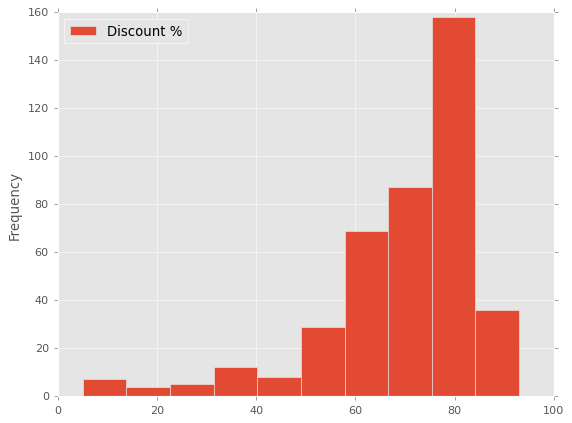

In [73]:
DD['Discount %'].plot(kind = 'hist', legend = True)

#### Representation
1) X axis representing the Discount in percentage%.
2) Y axis is representing the Frequency of the bags.
3) Out of 415 bags, nearly 160 bags have Discount of 80% and very few bags have Discount of between 10-50%.
4) Aroung 340 bags have Discount of 60-95%.

<Axes: ylabel='Frequency'>

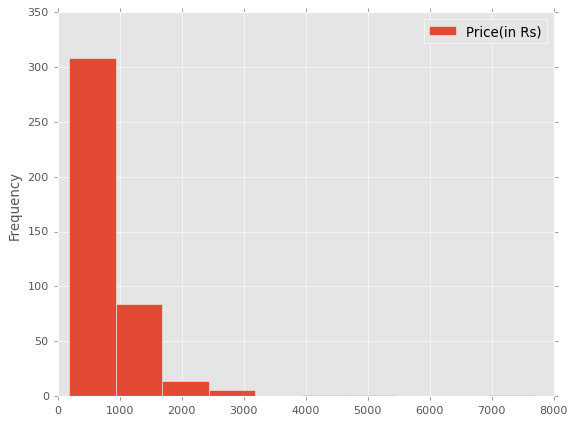

In [74]:
DD['Price(in Rs)'].plot(kind = 'hist',legend = True)

#### Representation
1) X axis representing the Selling Price of the bags and Y axis representing Frequency of the bags.
2) Aroung 390 bags are ranging between 300 and 3000, only couple of bags are being sold at 4000,5000 and 8000.
3) Where Maximum bags are priced below 1000 after discount.
4) Data is not normally distributed

<Axes: ylabel='Frequency'>

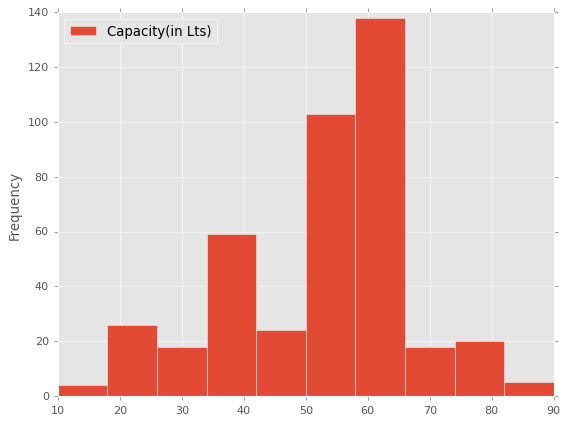

In [83]:
DD['Capacity(in Lts)'].plot(kind = 'hist', legend = True)

#### Representation
1) X axis representing the Capacity of the bags in Litres and Y axis representing Frequency of the bags.
2) Data Most of the bags are featured with 50 and 60 Lts capacity.
3) Very few bags with capacity below 30 and above 80 Lts.

#### Categorical Datatype

<Axes: >

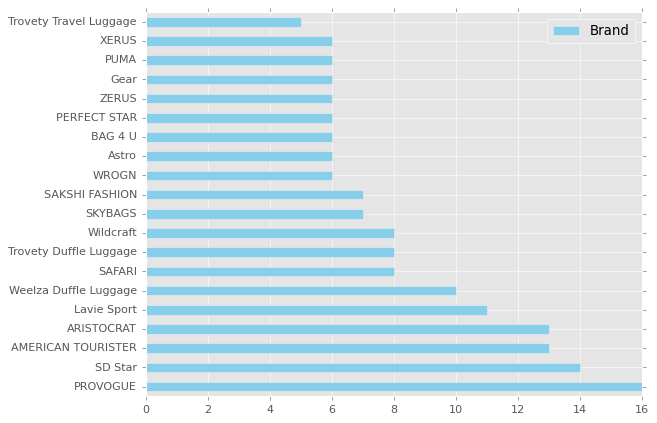

In [90]:
DD['Brand'].value_counts().nlargest(20).plot(kind = 'barh', color = 'skyblue', legend = True)

#### Representation
1) Top 20 Brands and their count of bags in x-axis.

<Axes: ylabel='Model'>

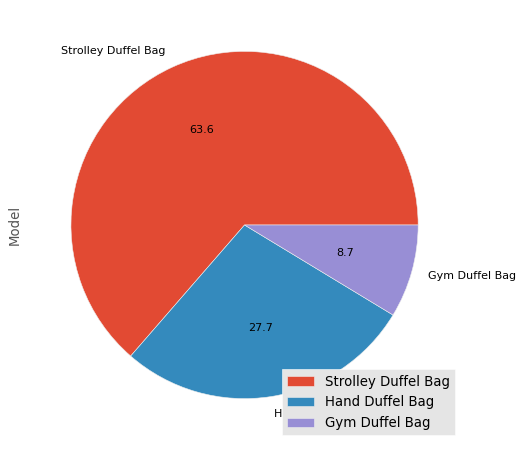

In [76]:
DD['Model'].value_counts().plot(kind = 'pie', autopct = '%1.1f', figsize = (7,7), legend = True)

#### Representation
1) Out of all options avaliable 63.6% bags belong to Strolley model and stands highest followed by Hand model and Gym bag model.


<Axes: ylabel='Free Delivery'>

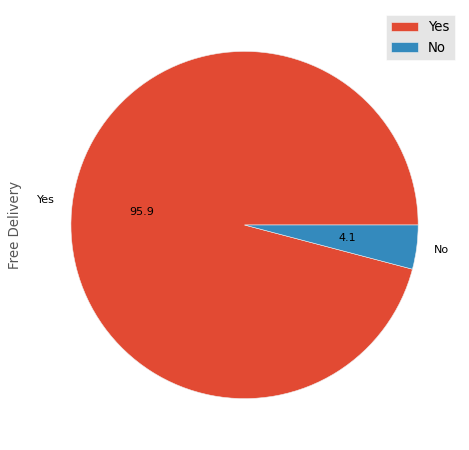

In [94]:
DD['Free Delivery'].value_counts().plot(kind = 'pie', autopct = '%1.1f', figsize = (7,7), legend = True)

#### Representation
1) 95.9% bags are delivered for free.
2) 4.1% bags are delivered for with Delivery Fee.

<Axes: xlabel='Range', ylabel='count'>

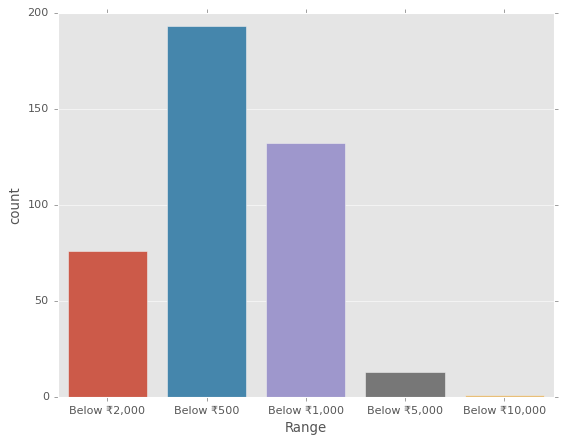

In [92]:
sns.countplot(DD, x = 'Range')

#### Representation
1) X axis is showing the range of bags. 
2) Nearly 190 bags are below 500.
3) Nearly 325 bags are ranged below 1000 as below 500 is also considered as below 1000.
4) Total 400 bags are ranged below 2000.

## Bivariate Analysis
#### Numerical and Categorical

<Axes: xlabel='Brand', ylabel='Price'>

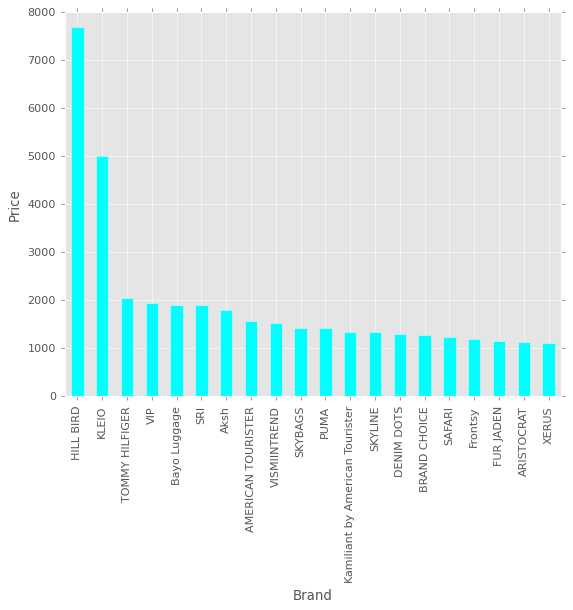

In [96]:
DD.groupby(by = "Brand")["Price(in Rs)"].median().nlargest(20).plot(kind = 'bar', color = "cyan", ylabel = "Price")

#### Representation
1) Top 20 Brands as per their average price in ascending order.

<Axes: xlabel='Brand'>

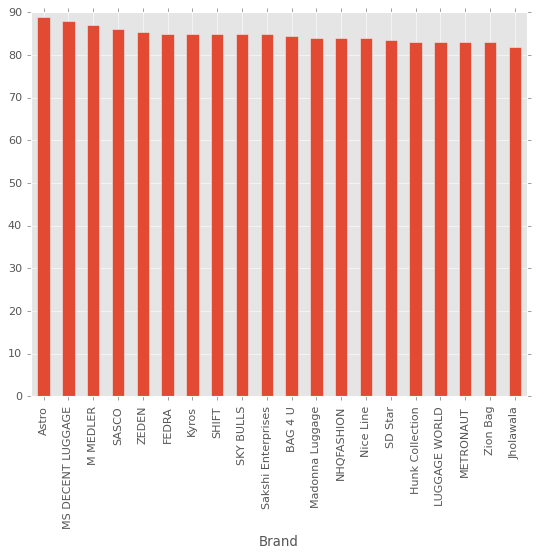

In [80]:
DD.groupby(by = "Brand")["Discount %"].median().nlargest(20).plot(kind = 'bar')

#### Representation
1) Top 20 Brands as per discount in ascending order.

## Categorical and Categorical

<Axes: xlabel='Range', ylabel='count'>

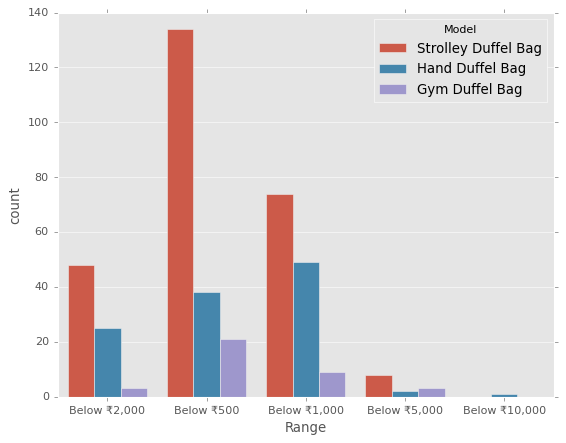

In [81]:
sns.countplot(data = DD,x = 'Range', hue = 'Model')

#### Representation
1) Model wise range of bags.
2) Only Hand Duffel Bag is found at Range 10000.
3) And very few bags are avaliable at Range 5000 inclusive all models.

#### MultiVariate

<Axes: >

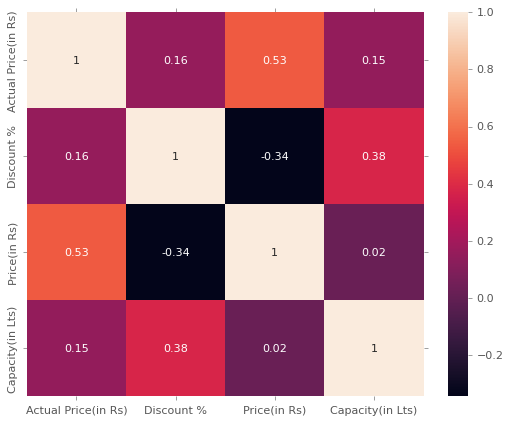

In [82]:
sns.heatmap(DD.corr(numeric_only = True), annot = True)

#### Representation
1) Strength is considered as Perfect for 0.9-1.0, strong for 0.7-0.9, moderate for 0.5-0.7 and weak for 0.0-0.5
2) The correlation Actual Price with the Selling Price is positive and Moderate where as correlation with Discount and capacity it is positive and weak. Which means with Change in Actual Price there is only moderate change in price and minimal change in discount and capacity.
3) The correlation with Selling Price is Negative and weak, where as with Capacity it is positive and weak. Which means the low selling price bags have high discounts.
4) The correlation of Capacity with Price is positive but very weak as it is nearly 0. Which mean capacity has no impact on Price.

## Data Manipulation

1) Model which can be carried through hands and also through wheels?
2) Bags which has capacity of 60 Litres or above?
3) Bags which are costing between 1000 and 5000 after discount?
4) Top 10 costly bags before discount and their selling price?
5) Bag which satisfies all the above requirement?

In [45]:
## Model which can be carried through hands and also through wheels?
DD[DD['Model'] == 'Strolley Duffel Bag']

Brand                Model  Actual Price(in Rs)  Discount %  \
0    AMERICAN TOURISTER  Strolley Duffel Bag               4090.0        61.0   
1                SAFARI  Strolley Duffel Bag               3870.0        71.0   
2                 Astro  Strolley Duffel Bag               2800.0        89.0   
3               SD Star  Strolley Duffel Bag               2500.0        85.0   
10   AMERICAN TOURISTER  Strolley Duffel Bag               4500.0        62.0   
..                  ...                  ...                  ...         ...   
864            PROVOGUE  Strolley Duffel Bag               3300.0        84.0   
869      SAKSHI FASHION  Strolley Duffel Bag               1999.0        80.0   
872            PROVOGUE  Strolley Duffel Bag               3300.0        86.0   
874            PROVOGUE  Strolley Duffel Bag               3300.0        81.0   
875            WAYCRAFT  Strolley Duffel Bag               3300.0        79.0   

     Price(in Rs)  Capacity(in Lts) Free Delivery         Range  
0          1569.0            78.000           Yes  Below ₹2,000  
1          1109.0            56.000           Yes  Below ₹2,000  
2           282.0            55.000            No    Below ₹500  
3           363.0            60.000           Yes    Below ₹500  
10         1669.0            52.375           Yes  Below ₹2,000  
..            ...               ...           ...           ...  
864         509.0            50.000           Yes  Below ₹1,000  
869         381.0            60.000           Yes    Below ₹500  
872         452.0            50.000           Yes    Below ₹500  
874         594.0            50.000           Yes  Below ₹1,000  
875         686.0            60.000           Yes  Below ₹1,000  

[264 rows x 8 columns]

In [46]:
## Bags which has capacity of 60 Litres or above?
DD[DD['Capacity(in Lts)']>=60]

Brand                Model  \
0                 AMERICAN TOURISTER  Strolley Duffel Bag   
3                            SD Star  Strolley Duffel Bag   
4                           Anjaneya      Hand Duffel Bag   
11   Kamiliant by American Tourister  Strolley Duffel Bag   
12                AMERICAN TOURISTER  Strolley Duffel Bag   
..                               ...                  ...   
839                      perfactstar      Hand Duffel Bag   
849                        Travalate      Hand Duffel Bag   
855                          Frontsy  Strolley Duffel Bag   
869                   SAKSHI FASHION  Strolley Duffel Bag   
875                         WAYCRAFT  Strolley Duffel Bag   

     Actual Price(in Rs)  Discount %  Price(in Rs)  Capacity(in Lts)  \
0                 4090.0        61.0        1569.0              78.0   
3                 2500.0        85.0         363.0              60.0   
4                  899.0        12.0         789.0              60.0   
11                3750.0        57.0        1599.0              66.0   
12                4090.0        62.0        1529.0              78.0   
..                   ...         ...           ...               ...   
839               1999.0        73.0         536.0              70.0   
849               1799.0        48.0         928.0              65.0   
855               5500.0        78.0        1207.0              86.0   
869               1999.0        80.0         381.0              60.0   
875               3300.0        79.0         686.0              60.0   

    Free Delivery         Range  
0             Yes  Below ₹2,000  
3             Yes    Below ₹500  
4             Yes  Below ₹1,000  
11            Yes  Below ₹2,000  
12            Yes  Below ₹2,000  
..            ...           ...  
839           Yes  Below ₹1,000  
849           Yes  Below ₹1,000  
855           Yes  Below ₹2,000  
869           Yes    Below ₹500  
875           Yes  Below ₹1,000  

[178 rows x 8 columns]

In [47]:
## Bags which are costing between 1000 and 5000 after discount?
DD[(DD["Price(in Rs)"]>1000) & (DD["Price(in Rs)"]<5000)]

Brand                Model  \
0                 AMERICAN TOURISTER  Strolley Duffel Bag   
1                             SAFARI  Strolley Duffel Bag   
7                 AMERICAN TOURISTER      Hand Duffel Bag   
10                AMERICAN TOURISTER  Strolley Duffel Bag   
11   Kamiliant by American Tourister  Strolley Duffel Bag   
..                               ...                  ...   
844                         PROVOGUE  Strolley Duffel Bag   
852                             PUMA      Hand Duffel Bag   
854                        FUR JADEN      Hand Duffel Bag   
855                          Frontsy  Strolley Duffel Bag   
865                           Strabo      Hand Duffel Bag   

     Actual Price(in Rs)  Discount %  Price(in Rs)  Capacity(in Lts)  \
0                 4090.0        61.0        1569.0            78.000   
1                 3870.0        71.0        1109.0            56.000   
7                 2950.0        61.0        1129.0            52.000   
10                4500.0        62.0        1669.0            52.375   
11                3750.0        57.0        1599.0            66.000   
..                   ...         ...           ...               ...   
844               4500.0        77.0        1019.0            50.000   
852               1299.0        22.0        1009.0            32.000   
854               4000.0        71.0        1150.0            35.000   
855               5500.0        78.0        1207.0            86.000   
865               1499.0        22.0        1165.0            50.000   

    Free Delivery         Range  
0             Yes  Below ₹2,000  
1             Yes  Below ₹2,000  
7             Yes  Below ₹2,000  
10            Yes  Below ₹2,000  
11            Yes  Below ₹2,000  
..            ...           ...  
844           Yes  Below ₹2,000  
852           Yes  Below ₹2,000  
854           Yes  Below ₹2,000  
855           Yes  Below ₹2,000  
865           Yes  Below ₹2,000  

[88 rows x 8 columns]

In [48]:
#### Top 10 costly bags before discount and their selling price?
A = DD.sort_values(by = 'Actual Price(in Rs)',ascending = False).head(10)
A

Brand                Model  Actual Price(in Rs)  Discount %  \
485                 VIP  Strolley Duffel Bag              64992.0        93.0   
678           HILL BIRD      Hand Duffel Bag              24496.0        68.0   
684         Lavie Sport  Strolley Duffel Bag              10384.0        83.0   
288        Bayo Luggage      Hand Duffel Bag               9000.0        78.0   
770             SKYBAGS  Strolley Duffel Bag               6404.0        64.0   
339        BRAND CHOICE  Strolley Duffel Bag               6000.0        78.0   
708        Leatherworld      Hand Duffel Bag               6000.0        81.0   
273          ARISTOCRAT  Strolley Duffel Bag               5672.0        64.0   
834                 VIP  Strolley Duffel Bag               5600.0        50.0   
542  AMERICAN TOURISTER  Strolley Duffel Bag               5600.0        49.0   

     Price(in Rs)  Capacity(in Lts) Free Delivery          Range  
485        4000.0              55.0           Yes   Below ₹5,000  
678        7700.0              55.0           Yes  Below ₹10,000  
684        1759.0              60.0           Yes   Below ₹2,000  
288        1899.0              50.0           Yes   Below ₹2,000  
770        2248.0              20.0           Yes   Below ₹5,000  
339        1282.0              80.0           Yes   Below ₹2,000  
708        1111.0              52.0           Yes   Below ₹2,000  
273        1987.0              55.0           Yes   Below ₹2,000  
834        2800.0              65.0           Yes   Below ₹5,000  
542        2840.0              60.0           Yes   Below ₹5,000

In [49]:
### Bag which satisfies all the above requirement?
B = DD[(DD['Model'] == 'Strolley Duffel Bag') & (DD['Capacity(in Lts)']>=60) & (DD["Price(in Rs)"]>1000) & (DD["Price(in Rs)"]<5000)]
A.merge(B)

Brand                Model  Actual Price(in Rs)  Discount %  \
0         Lavie Sport  Strolley Duffel Bag              10384.0        83.0   
1        BRAND CHOICE  Strolley Duffel Bag               6000.0        78.0   
2                 VIP  Strolley Duffel Bag               5600.0        50.0   
3  AMERICAN TOURISTER  Strolley Duffel Bag               5600.0        49.0   

   Price(in Rs)  Capacity(in Lts) Free Delivery         Range  
0        1759.0              60.0           Yes  Below ₹2,000  
1        1282.0              80.0           Yes  Below ₹2,000  
2        2800.0              65.0           Yes  Below ₹5,000  
3        2840.0              60.0           Yes  Below ₹5,000